In [1]:
!pip install pykalman

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.5/248.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 15.4 MB/s eta 0:00:00


Z-score

In [6]:
import numpy as np
import pandas as pd

# Пример данных
data = np.array([10, 12, 12, 13, 12 ])

# Z-Score
z_scores = (data - np.mean(data)) / np.std(data)
print(z_scores)
outliers_z = np.where(np.abs(z_scores) > 3)[0]
print("Z-Score outliers indices:", outliers_z)

# Modified Z-Score (использует медиану и MAD)
median = np.median(data)
mad = np.median(np.abs(data - median))
modified_z_scores = 0.6745 * (data - median) / mad
outliers_modified_z = np.where(np.abs(modified_z_scores) > 3.5)[0]
print("Modified Z-Score outliers indices:", outliers_modified_z)


[-1.83711731  0.20412415  0.20412415  1.22474487  0.20412415]
Z-Score outliers indices: []
Modified Z-Score outliers indices: [0 3]


<ipython-input-6-f8c241880986>:16: RuntimeWarning: divide by zero encountered in divide
  modified_z_scores = 0.6745 * (data - median) / mad
<ipython-input-6-f8c241880986>:16: RuntimeWarning: invalid value encountered in divide
  modified_z_scores = 0.6745 * (data - median) / mad


IQR

In [7]:
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = np.where((data < lower_bound) | (data > upper_bound))[0]
print("IQR outliers indices:", outliers_iqr)


IQR outliers indices: [0 3]


Isolation Forest

In [8]:
from sklearn.ensemble import IsolationForest

X = data.reshape(-1, 1)
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X)
preds = clf.predict(X)  # -1 — выброс, 1 — нормальные точки
outliers_iforest = np.where(preds == -1)[0]
print("Isolation Forest outliers indices:", outliers_iforest)


Isolation Forest outliers indices: [0]


Local outlier factor

In [9]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
preds = clf.fit_predict(X)  # -1 — выбросы
outliers_lof = np.where(preds == -1)[0]
print("LOF outliers indices:", outliers_lof)


LOF outliers indices: []


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (5). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


one-class SVM

In [10]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.1, kernel="rbf", gamma='scale')
clf.fit(X)
preds = clf.predict(X)  # -1 — выбросы
outliers_ocsvm = np.where(preds == -1)[0]
print("One-Class SVM outliers indices:", outliers_ocsvm)


One-Class SVM outliers indices: [3]


фильтр признаков низкой дисперсии

In [11]:
from sklearn.feature_selection import VarianceThreshold

# Пример с многомерными данными
X_multi = np.array([[0, 2, 0, 3],
                    [0, 1, 4, 3],
                    [0, 1, 1, 3]])

selector = VarianceThreshold(threshold=0.5)
X_reduced = selector.fit_transform(X_multi)
print("Selected features after Variance Threshold:", X_reduced)


Selected features after Variance Threshold: [[0]
 [4]
 [1]]


ANOVA F-test

In [12]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif

iris = load_iris()
X, y = iris.data, iris.target

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
print("Selected features shape:", X_new.shape)


Selected features shape: (150, 2)


kalman filter

In [13]:
from pykalman import KalmanFilter
import numpy as np

measurements = np.array([1, 2, 3, 2, 1, 0, 1, 2])

kf = KalmanFilter(initial_state_mean=measurements[0], n_dim_obs=1)
state_means, _ = kf.filter(measurements)
print("Kalman Filter estimates:", state_means.flatten())


Kalman Filter estimates: [1.         1.6        2.46153846 2.17647059 1.4494382  0.55364807
 0.8295082  1.55291171]


median filter

In [14]:
from scipy.signal import medfilt

signal = np.array([1, 2, 80, 2, 3, 2, 1])
filtered_signal = medfilt(signal, kernel_size=3)
print("Median filtered signal:", filtered_signal)


Median filtered signal: [1 2 2 3 2 2 1]


Non-Local Means Denoising

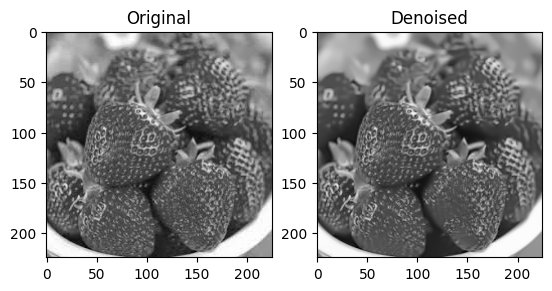

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/клубничке.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.fastNlMeansDenoising(img, None, h=10, templateWindowSize=7, searchWindowSize=21)

plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(dst, cmap='gray'), plt.title('Denoised')
plt.show()
